In [1]:
import os
import sys
import datetime
import warnings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sys.path.append(
    os.path.abspath('..'),
)

In [4]:
import bg_trade.envs as envs
from bg_trade.utils import fetch_data, build_db

In [5]:
warnings.simplefilter('ignore')

In [6]:
%matplotlib inline

---

In [7]:
db_name = 'HistoricalPriceData.db'
tickers = ['MSFT', 'AAPL', 'TSLA']
start = '01-01-2020'
end = datetime.datetime.now()

In [8]:
build_db(tickers, db_name, start=start, end=end)

MSFT (243, 8) 2020-02-13 00:00:00
Done - MSFT

AAPL (243, 8) 2020-02-13 00:00:00
Done - AAPL

TSLA (243, 8) 2020-02-13 00:00:00
Done - TSLA

Database is valid


In [12]:
data = fetch_data('HistoricalPriceData.db')
env = envs.TradingEnvNorm(data)

In [13]:
positions = env.positions
rewards = []

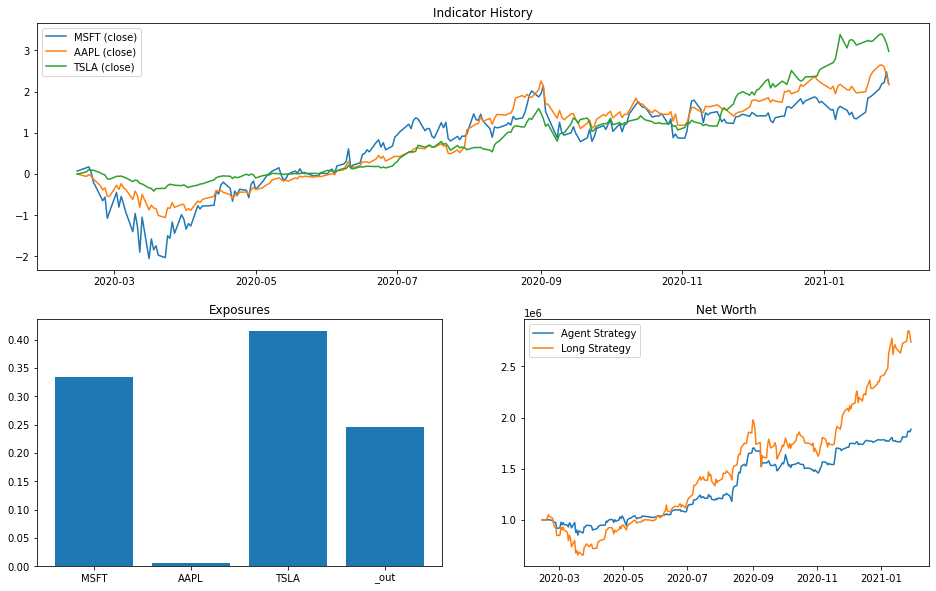

In [15]:
for episode in np.arange(1):

    done = False
    obs = env.reset()

    while not done:
        
        actions = env.format_action(
            positions,
            env.action_space.sample(),
        )

        obs, reward, done, info = env.step(actions)

        rewards.append(reward)
        env.render()
    

In [16]:
np.mean(rewards)

-0.2810702113723094

---